# Decicion Tree

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score

from sklearn.utils import resample
import platform
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
# https://wikidocs.net/45798
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

## Read data

In [2]:
df = pd.read_csv("data/final_data.csv", encoding='UTF-8')

In [3]:
df.head()

,성별,연령대코드,hour,month,day,이용건수,운동량,탄소량,이동거리(M),이용시간(분),미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),지면온도(°C)
0,0.0,10.0,0,1,1,8.0,266.58,2.88,12425.35,242.0,19.884615,8.269231,-8.5,0.0,1.9,41,0.0,0.0,-7.0
1,0.0,20.0,0,1,1,19.0,970.29,9.99,43077.64,454.0,19.884615,8.269231,-8.5,0.0,1.9,41,0.0,0.0,-7.0
2,0.0,30.0,0,1,1,9.0,772.36,7.17,30890.96,280.0,19.884615,8.269231,-8.5,0.0,1.9,41,0.0,0.0,-7.0
3,0.0,40.0,0,1,1,4.0,283.55,3.10,13338.07,116.0,19.884615,8.269231,-8.5,0.0,1.9,41,0.0,0.0,-7.0
4,0.0,50.0,0,1,1,1.0,85.20,0.77,3310.21,24.0,19.884615,8.269231,-8.5,0.0,1.9,41,0.0,0.0,-7.0


## Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117831 entries, 0 to 117830
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   성별            117831 non-null  float64
 1   연령대코드         117831 non-null  float64
 2   hour          117831 non-null  int64  
 3   month         117831 non-null  int64  
 4   day           117831 non-null  int64  
 5   이용건수          117831 non-null  float64
 6   운동량           117831 non-null  float64
 7   탄소량           117831 non-null  float64
 8   이동거리(M)       117831 non-null  float64
 9   이용시간(분)       117831 non-null  float64
 10  미세먼지(PM10)    117831 non-null  float64
 11  초미세먼지(PM2.5)  117831 non-null  float64
 12  기온(°C)        117831 non-null  float64
 13  강수량(mm)       117831 non-null  float64
 14  풍속(m/s)       117831 non-null  float64
 15  습도(%)         117831 non-null  int64  
 16  일조(hr)        117831 non-null  float64
 17  적설(cm)        117831 non-null  float64
 18  지면온도

In [5]:
df.describe()

,성별,연령대코드,hour,month,day,이용건수,운동량,탄소량,이동거리(M),이용시간(분),미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),지면온도(°C)
count,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,1.178310e+05,117831.000000,1.178310e+05,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000,117831.000000
mean,0.508576,39.319194,11.649939,6.551213,15.756278,136.180182,2.364319e+04,108.629025,4.682300e+05,4162.491950,32.982096,18.418576,13.492344,0.158701,2.373872,64.088754,0.275246,0.069394,15.218393
std,0.499929,19.625922,6.861063,3.431089,8.785974,206.901020,9.864413e+05,172.161256,7.420769e+05,6212.052572,21.955054,13.177783,11.250059,1.377061,1.144934,18.422551,0.413739,0.377394,13.436360
min,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,10.000000,3.038462,1.038462,-13.700000,0.000000,0.000000,17.000000,0.000000,0.000000,-10.500000
25%,0.000000,20.000000,6.000000,4.000000,8.000000,12.000000,1.003890e+03,9.110000,3.925555e+04,380.000000,20.153846,9.538462,4.700000,0.000000,1.600000,50.000000,0.000000,0.000000,4.100000
50%,1.000000,40.000000,12.000000,7.000000,16.000000,53.000000,4.482240e+03,40.190000,1.732280e+05,1646.000000,28.640000,15.115385,14.900000,0.000000,2.200000,65.000000,0.000000,0.000000,15.200000
75%,1.000000,60.000000,18.000000,10.000000,23.000000,172.000000,1.528510e+04,135.340000,5.833312e+05,5438.000000,40.400000,24.200000,23.300000,0.000000,3.000000,79.000000,0.700000,0.000000,24.800000
max,1.000000,70.000000,23.000000,12.000000,31.000000,2132.000000,1.000161e+08,3833.350000,1.652342e+07,61216.000000,353.461538,108.269231,35.600000,40.700000,8.800000,100.000000,1.000000,5.000000,59.800000


In [6]:
df.shape

(117831, 19)

In [7]:
df.loc[df['미세먼지(PM10)'] < 31, '미세먼지(PM10)'] = 0
# 0: Fine dust concentration is less than 31 (good)
df.loc[(df['미세먼지(PM10)'] > 30) & (df['미세먼지(PM10)'] < 81), '미세먼지(PM10)'] = 1
# 1: Fine dust concentration between 31 and 81 (normal)
df.loc[(df['미세먼지(PM10)'] > 80) & (df['미세먼지(PM10)'] < 151), '미세먼지(PM10)'] = 2
# 2: Fine dust concentration is 81 or more but less than 151 (bad)
df.loc[df['미세먼지(PM10)'] > 150, '미세먼지(PM10)'] = 3
# 3: Fine dust concentration over 151 (very bad)
df['미세먼지(PM10)'] = df['미세먼지(PM10)'].astype(int)
# Convert the data type of a column to integer type


In [8]:
df.loc[df['초미세먼지(PM2.5)'] < 16, '초미세먼지(PM2.5)'] = 0
# 0: Ultrafine dust concentration is less than 16 (good)
df.loc[(df['초미세먼지(PM2.5)'] > 15) & (df['초미세먼지(PM2.5)'] < 36), '초미세먼지(PM2.5)'] = 1
# 1: Ultrafine dust concentration between 16 and 36 (normal)
df.loc[(df['초미세먼지(PM2.5)'] > 35) & (df['초미세먼지(PM2.5)'] < 76), '초미세먼지(PM2.5)'] = 2
# 2: Ultrafine dust concentration between 36 and less than 76 (bad)
df.loc[df['초미세먼지(PM2.5)'] > 75, '초미세먼지(PM2.5)'] = 3
# 3: Ultrafine dust concentration over 76 (very bad)
df['초미세먼지(PM2.5)'] = df['초미세먼지(PM2.5)'].astype(int)
# Convert the data type of a column to integer type


In [9]:
# Divide by quartile
df.loc[df['이동거리(M)'] <= 173228, '이동거리(M)'] = 0

df.loc[df['이동거리(M)'] >= 173228, '이동거리(M)'] = 1

df = df.astype({'이동거리(M)':'int'})
# Convert the data type of a column to integer type


In [10]:
# Indexing is carried out by dividing into approximate standard temperatures of winter, spring, and summer. 
df.loc[df['기온(°C)'] < 0, '기온(°C)'] = 0   
# 0: Temperature below 0 (winter)
df.loc[(df['기온(°C)'] > -1) & (df['기온(°C)'] < 20), '기온(°C)'] = 1
# 1: Temperature above 0 but below 20 (spring)
df.loc[(df['기온(°C)'] > 19), '기온(°C)'] = 2 
# 2: Temperature above 20 (summer)
df['기온(°C)'] = df['기온(°C)'].astype(int)
# Convert the data type of a column to integer type


In [11]:
# Divide by quartile
df.loc[df['습도(%)'] < 51, '습도(%)'] = 0
# 0: Humidity less than 51
df.loc[(df['습도(%)'] > 50) & (df['습도(%)'] < 66), '습도(%)'] = 1
# 1: Humidity above 51 but below 66
df.loc[(df['습도(%)'] > 65) & (df['습도(%)'] < 80), '습도(%)'] = 2
# 2: Humidity above 66 but below 80
df.loc[df['습도(%)'] > 79, '습도(%)'] = 3
# 3: Humidity above 80
df['습도(%)'] = df['습도(%)'].astype(int)
# Convert the data type of a column to integer type


In [12]:
# Divide by quartile
df.loc[df['지면온도(°C)'] < 5, '지면온도(°C)'] = 0
# 0: Ground temperature is less than 5
df.loc[(df['지면온도(°C)'] > 4) & (df['지면온도(°C)'] < 16), '지면온도(°C)'] = 1
# 1: Ground temperature is between 5 and 16
df.loc[(df['지면온도(°C)'] > 15) & (df['지면온도(°C)'] < 25), '지면온도(°C)'] = 2
# 2: Ground temperature is above 16 and below 25
df.loc[df['지면온도(°C)'] > 24, '지면온도(°C)'] = 3
# 3: Ground temperature is above 25
df['지면온도(°C)'] = df['지면온도(°C)'].astype(int)
# Convert the data type of a column to integer type


In [13]:
# Divide by quartile
df.loc[df['풍속(m/s)'] <= 1.6, '풍속(m/s)'] = 0
# 0: Wind speed is 1.6 or less
df.loc[(df['풍속(m/s)'] >= 1.6) & (df['풍속(m/s)'] <= 2.2), '풍속(m/s)'] = 1
# 1: Wind speed is 1.6 or more and 2.2 or less
df.loc[(df['풍속(m/s)'] >= 2.2) & (df['풍속(m/s)'] <= 3), '풍속(m/s)'] = 2
# 2: Wind speed is 2.2 or more and 3 or less
df.loc[df['풍속(m/s)'] >= 3, '풍속(m/s)'] = 3
# 3: Wind speed is 3 or more
df['풍속(m/s)'] = df['풍속(m/s)'].astype(int)
# Convert the data type of a column to integer type
df.loc[df['강수량(mm)'] > 0, '강수량(mm)'] = 1
# 1: Precipitation exceeds 0
df['강수량(mm)'] = df['강수량(mm)'].astype(int)
# Convert the data type of a column to integer type


In [14]:
df.loc[df['적설(cm)'] > 0, '적설(cm)'] = 1
# 1: Snow cover exceeds 0
df['적설(cm)'] = df['적설(cm)'].astype(int)
# Convert the data type of a column to integer type


In [15]:
df["성별"] = df["성별"].astype(int)
df["연령대코드"] = df["연령대코드"].astype(int)
df["이동거리(M)"] = df["이동거리(M)"].astype(int)


## Feature Selection

In [16]:
corrMatt = df[["성별", "연령대코드", "hour", "month", "day", "이용건수", "운동량", "탄소량", "이동거리(M)", "이용시간(분)", "미세먼지(PM10)", "초미세먼지(PM2.5)", "기온(°C)", "강수량(mm)", "풍속(m/s)", "습도(%)", "일조(hr)", "적설(cm)", "지면온도(°C)"]]
corrMatt = corrMatt.corr()

<Axes: >

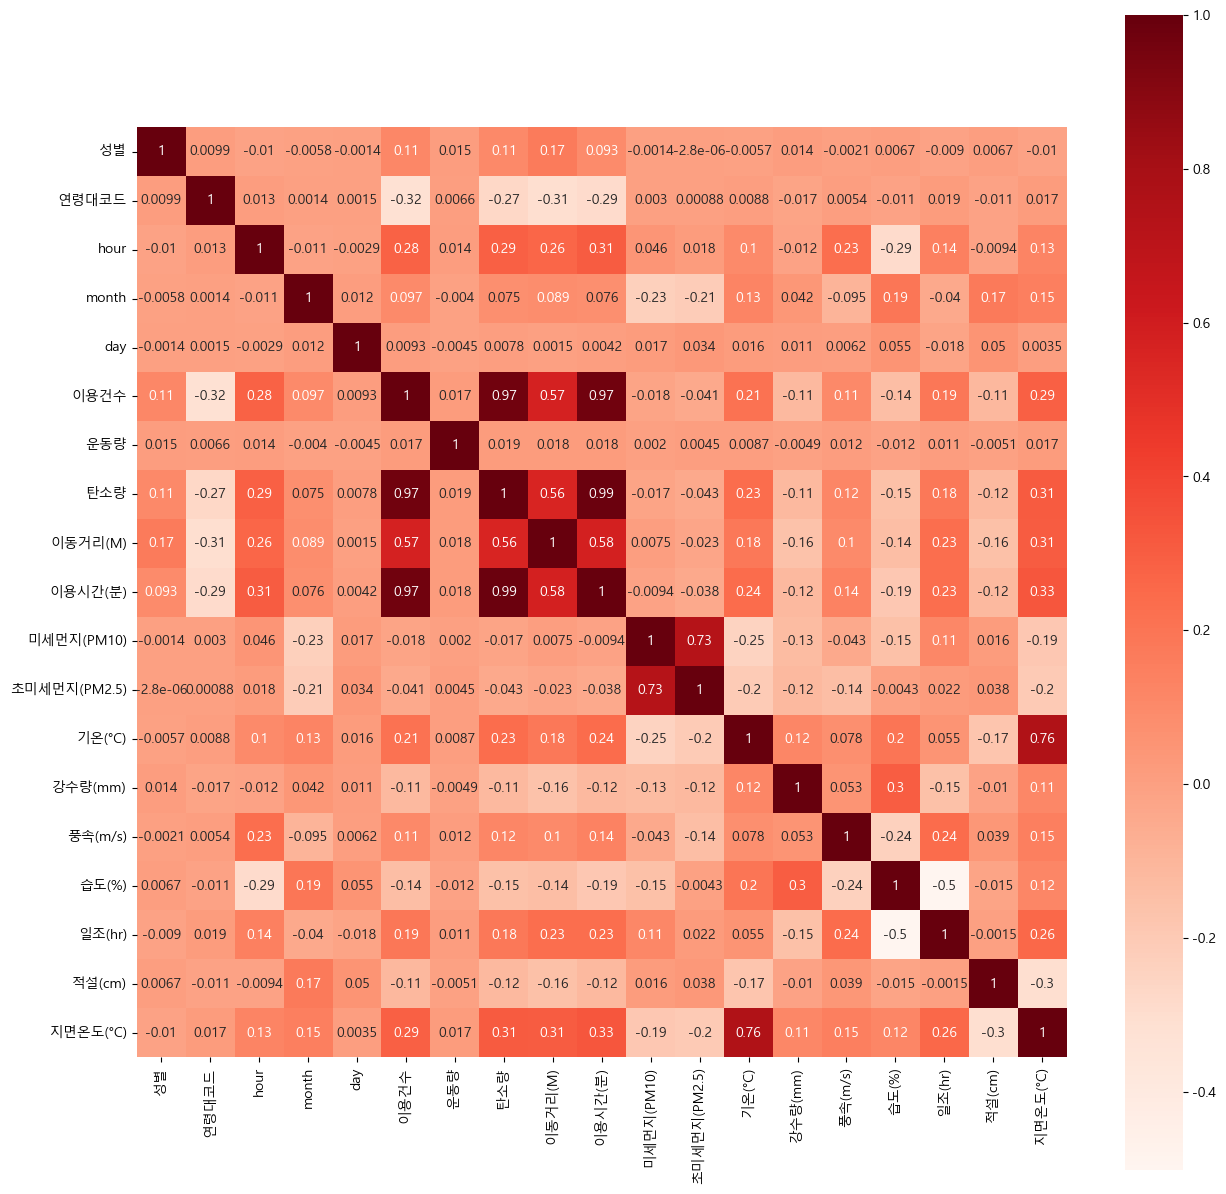

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrMatt,annot=True, square=True, cmap ='Reds')

In [18]:
df = df.drop(columns={"이용건수","운동량","탄소량", "이용시간(분)"}) # Strong Relationship with Travel Distance

In [19]:
df = df.drop(columns={"지면온도(°C)"}) # Significant Relationship with Temperature

In [20]:
df = df.drop(columns={"일조(hr)"}) # Dropped as it Appears to Have No Impact on the Analysis
df2 =df

In [21]:
# Determine the analysis was compromised due to inconsistent particulate matter ratios, drop for now
df.drop(columns={"미세먼지(PM10)", "초미세먼지(PM2.5)"})

,성별,연령대코드,hour,month,day,이동거리(M),기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,0,10,0,1,1,0,1,0,1,0,0
1,0,20,0,1,1,0,1,0,1,0,0
2,0,30,0,1,1,0,1,0,1,0,0
3,0,40,0,1,1,0,1,0,1,0,0
4,0,50,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
117826,1,30,23,12,31,1,1,0,0,2,0
117827,1,40,23,12,31,0,1,0,0,2,0
117828,1,50,23,12,31,0,1,0,0,2,0
117829,1,60,23,12,31,0,1,0,0,2,0


### For ease of judgment!

In [22]:
df.loc[df["연령대코드"] < 11, "연령대코드"] = 0
df.loc[(df["연령대코드"] > 10) & (df["연령대코드"] < 31), "연령대코드"] = 1
df.loc[(df["연령대코드"] > 30) & (df["연령대코드"] < 51), "연령대코드"] = 2
df.loc[df["연령대코드"] > 50, "연령대코드"] = 3
df["연령대코드"] = df["연령대코드"].astype(int)
# Convert the data type of a column to integer type


In [23]:
df.loc[df["month"] <= 3, "month"] = 0
df.loc[(df["month"] >= 3) & (df["month"] <= 6), "month"] = 1
df.loc[(df["month"] >= 6) & (df["month"] <= 9), "month"] = 2
df.loc[df["month"] >= 9, "month"] = 3
df["month"] = df["month"].astype(int)
# Convert the data type of a column to integer type


## Discontinued OneHotEncoder for Enhanced Interpretability

In [24]:
# # 범주형 변수 선택
# categorical_features = ['성별', '연령대코드', 'day']

# # 범주형 변수들을 인코딩
# encoder = OneHotEncoder()
# encoded_data = encoder.fit_transform(df[categorical_features])

# # 인코딩된 데이터를 데이터프레임으로 변환
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# # 인코딩된 데이터와 연속형 변수들을 합침
# df_encoded = pd.concat([encoded_df, df.drop(columns=categorical_features)], axis=1)


In [25]:
# print(df_encoded.columns)

In [26]:
# df_encoded.head()

In [27]:
# df_encoded.shape

## 최적화 

In [28]:
# Reduce Memory Usage
# reference : https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65 @ARJANGROEN

def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

In [29]:
# Meaningless in the current code, but used initially due to memory constraints!
reduce_memory_usage(df)

Memory usage of dataframe is 6.74 MB
Memory usage became:  1.4609670639038086  MB


,성별,연령대코드,hour,month,day,이동거리(M),미세먼지(PM10),초미세먼지(PM2.5),기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,1,0,0
3,0,2,0,0,1,0,0,0,1,0,1,0,0
4,0,2,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117826,1,1,23,3,31,1,1,2,1,0,0,2,0
117827,1,2,23,3,31,0,1,2,1,0,0,2,0
117828,1,2,23,3,31,0,1,2,1,0,0,2,0
117829,1,3,23,3,31,0,1,2,1,0,0,2,0


# Modeling

In [30]:
# # Label data: This is the output data that the model will predict
X = df.drop(["이동거리(M)"], axis=1)
# Feature data: This is the input data that the model will learn from
y = df[["이동거리(M)"]].astype(int)
# Label data: This is the output data that the model will predict

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 90% of the total data is used as test data, and the remaining 10% is used as training data
# Set a random seed to make data segmentation results reproducible

In [32]:
tree_model = DecisionTreeClassifier(random_state=100, max_depth=10)
tree_model.fit(X_train, y_train)
# Train a decision tree model using training data (X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=100)

In [33]:
y_pred = tree_model.predict(X_test)
# Perform predictions on test data (X_test) using the learned model and then save the prediction results on the test data.

In [34]:
# Reference: https://velog.io/@gggggeun1/결정트리-그래프-exportgraphviz
# Generate an output file that graphviz can read and visualize in graph form
import graphviz
export_graphviz(tree_model, out_file='tree.dot', feature_names=X_train.columns, impurity=True, filled=True)

# Visualize using the saved tree.dot file
with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Evaluation

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy, precision, recall))

Accuracy: 0.8793, Precision: 0.8799, Recall: 0.8793


In [36]:
# Setting up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using F1 score as the scoring metric
cv_scores = cross_val_score(tree_model, X_test, y_test, cv=kf, scoring='f1_macro')

# Print cross-validation results
print(f"K-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of F1 Scores: {np.std(cv_scores)}")

K-Fold Cross-Validation F1 Scores: [0.85192775 0.86795525 0.86800661 0.85489818 0.85993168]
Mean F1 Score: 0.8605438970632937
Standard Deviation of F1 Scores: 0.006589493558245855


In [37]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)

# Apply GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best model and hyperparameters
print("Best model:", grid_search.best_estimator_)
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate performance on the test set
print("Test set accuracy:", grid_search.score(X_test, y_test))


Best model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Test set accuracy: 0.8794127630685675


## 미세먼지 비율 맞춤 & oversamlping (SMOTE)

In [38]:
# 미세먼지 비율이 맞지 않아 관계가 잘 못 분석되었다 판단
# 다수 클래스와 소수 클래스의 샘플 수 확인
majority_class_samples = df2[df2['미세먼지(PM10)'] <= 1]
minority_class_samples = df2[df2['미세먼지(PM10)'] >= 2]

# 다수 클래스에서 소수 클래스와 같은 수의 샘플을 무작위로 선택하여 샘플링
undersampled_majority_class = resample(majority_class_samples,
                                       replace=False,  # 중복 샘플 허용하지 않음
                                       n_samples=len(minority_class_samples),  # 소수 클래스와 같은 수의 샘플 선택
                                       random_state=42)  # 재현성을 위한 난수 초기화 값

# 언더 샘플링된 다수 클래스와 소수 클래스를 결합하여 새로운 데이터셋 생성
undersampled_df = pd.concat([undersampled_majority_class, minority_class_samples])
df2 = undersampled_df


In [39]:
# # Label data: This is the output data that the model will predict
X = df2.drop(["이동거리(M)"], axis=1)
# Feature data: This is the input data that the model will learn from
y = df2[["이동거리(M)"]].astype(int)
# Label data: This is the output data that the model will predict

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
# over sampling
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
tree_model = DecisionTreeClassifier(random_state=100, max_depth=5)
tree_model.fit(X_train, y_train)
# Train a decision tree model using training data (X_train, y_train)
y_pred = tree_model.predict(X_test)
# Perform predictions on test data (X_test) using the learned model and then save the prediction results on the test data.


In [43]:
# Setting up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using F1 score as the scoring metric
cv_scores = cross_val_score(tree_model, X_test, y_test, cv=kf, scoring='f1_macro')

# Print cross-validation results
print(f"K-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of F1 Scores: {np.std(cv_scores)}")

K-Fold Cross-Validation F1 Scores: [0.80322581 0.82785729 0.85041209 0.82644628 0.83138239]
Mean F1 Score: 0.8278647695845958
Standard Deviation of F1 Scores: 0.015032271001131107


In [44]:
# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)

# Apply GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best model and hyperparameters
print("Best model:", grid_search.best_estimator_)
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate performance on the test set
print("Test set accuracy:", grid_search.score(X_test, y_test))


Best model: DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10)
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test set accuracy: 0.8731466227347611


In [45]:
import graphviz
export_graphviz(tree_model, out_file='tree.dot', feature_names=X_train.columns, impurity=True, filled=True)

# Visualize using the saved tree.dot file
with open("tree.dot", encoding='utf-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH